<a href="https://colab.research.google.com/github/hangli-hl/hangli-hl.github.io/blob/master/Machine_Learning_Methods_Book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning

Introduction to Supervised Learning

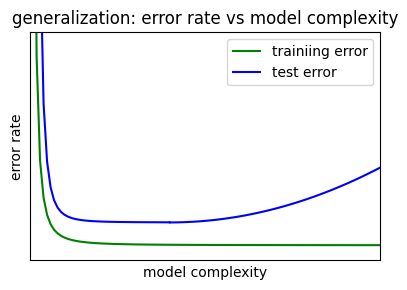

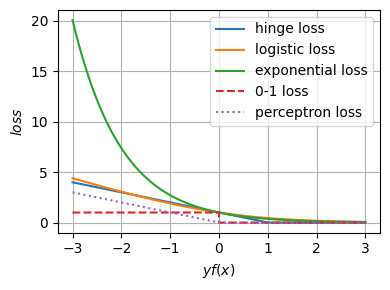

[2.00000000e-01 1.04000000e-01 5.79200000e-02 3.33440000e-02
 1.95814400e-02 1.16542054e-02 7.00356116e-03 4.23974971e-03
 2.58146284e-03 1.57912055e-03 9.69696438e-04 5.97393709e-04
 3.69048035e-04 2.28527620e-04 1.41806449e-04 8.81549520e-05
 5.48910237e-05 3.42282540e-05 2.13714196e-05 1.33595817e-05
 8.36019490e-06 5.23676846e-06 3.28320719e-06 2.06010797e-06
 1.29363245e-06]
[0.3        0.216      0.16308    0.126036   0.09880866 0.07822479
 0.06237521 0.05001254 0.04027694 0.03255336 0.02638994 0.021448
 0.01746974 0.01425653 0.01165383 0.00954044 0.00782066 0.00641854
 0.00527348 0.00433693 0.0035699  0.00294094 0.00242462 0.00200034
 0.00165136]
[0.4        0.352      0.31744    0.289792   0.26656768 0.24650187
 0.22884395 0.21310318 0.19893649 0.18609202 0.17437787 0.16364344
 0.15376777 0.14465176 0.13621295 0.12838173 0.12109869 0.11431262
 0.10797895 0.10205863 0.09651722 0.09132412 0.08645205 0.08187654
 0.07757556]
[0.49       0.485002   0.481255   0.47813375 0.47540375 0

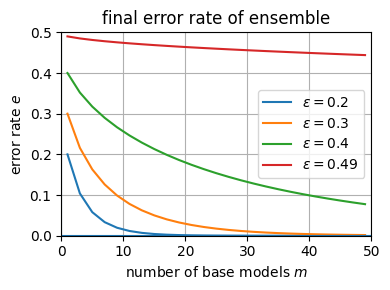

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt


########### Plot generalization

plt.xlim(0, 10)
plt.ylim(0, 30)

# training error
x = np.linspace(0.1, 10, 100)
y = 1 / ( x ** 2 ) + 2
plt.plot(x, y, color='g', label = 'trainiing error')


# test error, part one
x = np.linspace(0.1, 4, 40)
y = 1 / ( x ** 3 ) + 5
plt.plot(x, y, color = 'b', label = 'test error')
# test error, part two
x = np.linspace(4, 10, 60)
y = 0.2 * (x - 4)**2 + 5
plt.plot(x, y, color = 'b')

plt.title('generalization: error rate vs model complexity')
plt.xlabel('model complexity')
plt.ylabel('error rate')
plt.legend()

plt.xticks([])
plt.yticks([])

plt.show()


########### Plot loss functions

def hinge(x):
    y = np.maximum(0, 1-x)
    return(y)

def logistic(x):
    y = np.log(1 + np.exp(-x)) / np.log(2)
    return y

def exponential(x):
    return np.exp(-x)

def percepton(x):   # loss in perceptron learning
    y = np.maximum(0, -x)
    return(y)

def zero_one(x):
    y = []
    for t in np.nditer(x):
        if t > 0:
           y.append(0)
        else:
           y.append(1)
    return(y)


x = np.arange(-3, 3, 0.001)
y1 = hinge(x)
y2 = logistic(x)
y3 = exponential(x)
y4 = zero_one(x)
y5 = percepton(x)

plt.plot(x, y1, linestyle = 'solid', label='hinge loss')
plt.plot(x, y2, linestyle = 'solid', label='logistic loss')
plt.plot(x, y3, linestyle = 'solid', label='exponential loss')
plt.plot(x, y4, linestyle = 'dashed', label ='0-1 loss')
plt.plot(x, y5, linestyle = 'dotted', label = 'perceptron loss')
plt.xlabel("$yf(x)$")
plt.ylabel("$loss$")
plt.legend()
plt.grid()
plt.show()


###################.  Number of errors in ensemble learning

max_num_model = 50


def calculate_error(epsilon):
    error_array = np.array([])
    for num_model in range (1, max_num_model, 2):  # odd number of models
        num_error_model = num_model // 2 + 1  # number of error models is larger
        error = 0.0
        for num in range (num_error_model, num_model+1, 1):
            error += math.comb(num_model, num) * (epsilon ** num) * ((1.0-epsilon) ** (num_model-num))
        error_array = np.append(error_array, error)
    print(error_array)
    return(error_array)


plt.xlim(0, 50)
plt.ylim(0, 0.5)

x = np.arange(1, max_num_model, 2)

y1 = calculate_error(0.2)
y2 = calculate_error(0.3)
y3 = calculate_error(0.4)
y4 = calculate_error(0.49)

plt.plot(x, y1, label='$\epsilon=0.2$')
plt.plot(x, y2, label='$\epsilon=0.3$')
plt.plot(x, y3, label='$\epsilon=0.4$')
plt.plot(x, y4, label='$\epsilon=0.49$')

plt.axhline()
plt.axvline()
plt.grid()
plt.xlabel("number of base models $m$")
plt.ylabel("error rate $e$")
plt.legend(loc='center right')
plt.title('final error rate of ensemble')
plt.show()



Function Approximation Algorithm

weights= [[ 0.03414918]
 [-0.32353535]
 [ 1.35387529]
 [-1.46487956]
 [-1.95083333]]


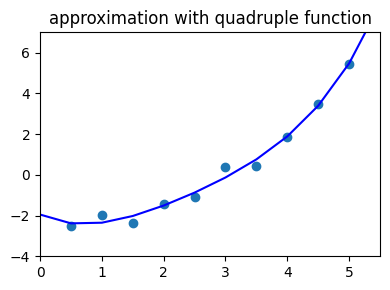

weights= [[ 0.40924242]
 [-0.57798485]
 [-2.1245    ]]


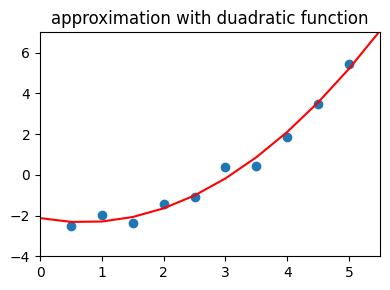

weights= [[ 1.67284848]
 [-4.37533333]]


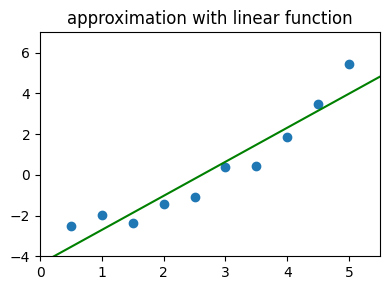

In [ ]:
#########################################################
#        Polinomial Function Approximation Algorithm
#########################################################

import numpy as np
import matplotlib.pyplot as plt


# lib function
def truncate_float(float_number, decimal_places):
    multiplier = 10 ** decimal_places
    return int(float_number * multiplier) / multiplier

def generate_data(num_instances):
  # generate e_list as gaussian noise
  u = 0
  v = 0.5
  e_list = np.random.normal(u, v, num_instances)

  # define i_list as independent variable
  s = 0.5
  i_list = []
  for i in range(num_instances):
    x = s * (i + 1)
    i_list.append(x)

  # define dependent variable with linear function
  w2 = 0.5
  w1 = -1
  w0 = -2
  d_list = []
  for i in range(num_instances):
    d = w2 * (i_list[i] ** 2) + w1 * i_list[i] + w0 + e_list[i]
    d = truncate_float(d, 2)
    d_list.append(d)

  i_array = np.array(i_list)
  d_array = np.array(d_list)

  return(i_array, d_array)


def generate_linear_data(i_array, d_array, num_instances):

    x_list = []
    for i in range(num_instances):
        x = i_array[i]
        x_list.extend([x, 1.0])

    x_array = np.array(x_list)

    x_matrix = x_array.reshape(num_instances, 2)
    y_matrix = d_array.reshape(num_instances, 1)

  # print data
    #print("x_matrix=", x_matrix)
    #print("y_matrix=", y_matrix)

    return(x_matrix, y_matrix)


def generate_quadratic_data(i_array, d_array, num_instances):

    x_list = []
    for i in range(num_instances):
        x = i_array[i]
        x_list.extend([x ** 2, x, 1.0])

    x_array = np.array(x_list)

    x_matrix = x_array.reshape(num_instances, 3)
    y_matrix = d_array.reshape(num_instances, 1)

  # print data
    #print("x_matrix=", x_matrix)
    #print("y_matrix=", y_matrix)

    return(x_matrix, y_matrix)


def generate_cubic_data(i_array, d_array, num_instances):

    x_list = []
    for i in range(num_instances):
        x = i_array[i]
        x_list.extend([x ** 3, x ** 2, x, 1.0])

    x_array = np.array(x_list)

    x_matrix = x_array.reshape(num_instances, 4)
    y_matrix = d_array.reshape(num_instances, 1)

  # print data
    #print("x_matrix=", x_matrix)
    #print("y_matrix=", y_matrix)

    return(x_matrix, y_matrix)


def generate_quadruple_data(i_array, d_array, num_instances):

    x_list = []
    for i in range(num_instances):
        x = i_array[i]
        x_list.extend([x ** 4, x ** 3, x ** 2, x, 1.0])

  # create i_array, d_array, x-matix, y_matrix
    x_array = np.array(x_list)

    x_matrix = x_array.reshape(num_instances, 5)
    y_matrix = d_array.reshape(num_instances, 1)

  # print data
    #print("x_matrix=", x_matrix)
    #print("y_matrix=", y_matrix)

    return(x_matrix, y_matrix)


############################################# Algorithm 2: Gradient Descent

def normal_equation(x_matrix, y_matrix, num_instances):

  # compute pseudo inverse
  pseudoinverse = np.linalg.pinv(x_matrix)

  # solve problem, weights1 is 2-d array or matrix
  weights = np.matmul(pseudoinverse, y_matrix)

  print("weights=", weights)

  return(weights)


def plot_data(i_array, d_array):
    # plot data
    x_points = i_array
    y_points = d_array

    plt.scatter(x_points, y_points, label='o')


def plot_linear_function(i_array, d_array, weights):

    t = np.arange(0.0, 6, 0.5)
    plt.plot(t, weights[0] * t + weights[1], 'g')


def plot_quadratic_function(i_array, d_array, weights):

    t = np.arange(0.0, 6, 0.5)
    plt.plot(t, weights[0] * t ** 2 + weights[1] * t + weights[2], 'r')


def plot_cubic_function(i_array, d_array, weights):

    t = np.arange(0.0, 6, 0.5)
    plt.plot(t, weights[0] * t ** 3 + weights[1] * t ** 2 + weights[2] * t + weights[3], 'b')


def plot_quadruple_function(i_array, d_array, weights):

    t = np.arange(0.0, 6, 0.5)
    plt.plot(t, weights[0] * t ** 4 + weights[1] * t ** 3 + weights[2] * t ** 2 + weights[3] * t + weights[4] , 'b')


def main():
    num_instances = 10
    i_array, d_array = generate_data(num_instances)

    plt.xlim(0, 5.5)
    plt.ylim(-4, 7)
    plot_data(i_array, d_array)
    x_matrix, y_matrix = generate_quadruple_data(i_array, d_array, num_instances)
    weights = normal_equation(x_matrix, y_matrix, num_instances)
    plot_quadruple_function(i_array, d_array, weights)
    plt.title('approximation with quadruple function')
    plt.show()

    #x_matrix, y_matrix = generate_cubic_data(i_array, d_array, num_instances)
    #weights = normal_equation(x_matrix, y_matrix, num_instances)
    #plot_cubic_function(i_array, d_array, weights)
    #plt.title('approximation with cubical function')
    #plt.show()

    plt.xlim(0, 5.5)
    plt.ylim(-4, 7)
    plot_data(i_array, d_array)
    x_matrix, y_matrix = generate_quadratic_data(i_array, d_array, num_instances)
    weights = normal_equation(x_matrix, y_matrix, num_instances)
    plot_quadratic_function(i_array, d_array, weights)
    plt.title('approximation with duadratic function')
    plt.show()

    plt.xlim(0, 5.5)
    plt.ylim(-4, 7)
    plot_data(i_array, d_array)
    x_matrix, y_matrix = generate_linear_data(i_array, d_array, num_instances)
    weights = normal_equation(x_matrix, y_matrix, num_instances)
    plot_linear_function(i_array, d_array, weights)
    plt.title('approximation with linear function')
    plt.show()



if __name__ == "__main__":
    main()


Linear Regression

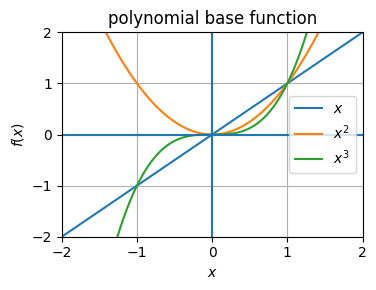

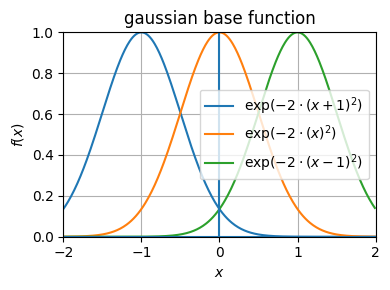

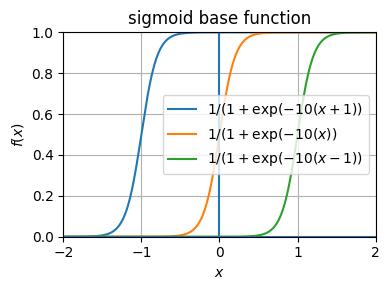

In [ ]:
##########################################################
#  Plot for linear regression
##########################################################

import numpy as np
import math
import matplotlib.pyplot as plt

#################### polinomial functions

plt.xlim(-2, 2)
plt.ylim(-2, 2)

x = np.arange(-2, 2, 0.01)
y1 = np.power(x, 1)
y2 = np.power(x, 2)
y3 = np.power(x, 3)

plt.plot(x, y1, label='$x$')
plt.plot(x, y2, label='$x^2$')
plt.plot(x, y3, label='$x^3$')

plt.axhline()
plt.axvline()
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend(loc='center right')
plt.title('polynomial base function')
plt.show()

#################### gaussian functions

plt.xlim(-2, 2)
plt.ylim(0, 1)

x = np.arange(-2, 2, 0.01)
y1 = np.exp((-2) * (x+1)**2)
y2 = np.exp((-2) * (x)**2)
y3 = np.exp((-2) * (x-1)**2)

plt.plot(x, y1, label='$\exp(-2 \cdot (x+1)^2)$')
plt.plot(x, y2, label='$\exp(-2 \cdot (x)^2)$')
plt.plot(x, y3, label='$\exp(-2 \cdot (x-1)^2)$')

plt.axhline()
plt.axvline()
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.title('gaussian base function')
plt.show()

#################### sigmoid functions

plt.xlim(-2, 2)
plt.ylim(0, 1)

x = np.arange(-2, 2, 0.01)
y1 = 1 / (1 + np.exp((-10) * (x+1)))
y2 = 1 / (1 + np.exp((-10) * (x)))
y3 = 1 / (1 + np.exp((-10) * (x-1)))

plt.plot(x, y1, label='$1 / (1 + \exp(-10(x+1))$')
plt.plot(x, y2, label='$1 / (1 + \exp(-10(x))$')
plt.plot(x, y3, label='$1 / (1 + \exp(-10(x-1))$')

plt.axhline()
plt.axvline()
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.title('sigmoid base function')
plt.show()



Linear Regression Algorithm

x_matrix= [[0.5 1. ]
 [1.  1. ]
 [1.5 1. ]]
y_matrix= [[1.89]
 [2.12]
 [2.15]]
weights1= [[0.26      ]
 [1.79333333]]
weights2= [0.48216875 0.5086625 ]
weights2= [0.70684559 0.76640163]
weights2= [0.80683841 0.9021161 ]
weights2= [0.84657438 0.97835025]
weights2= [0.85730503 1.02545555]
weights2= [0.85418648 1.0581645 ]
weights2= [0.84456608 1.08363164]
weights2= [0.83200283 1.10533481]
weights2= [0.81821791 1.12496788]
weights2= [0.80404098 1.14335899]
weights2= [0.78986933 1.16091616]
weights2= [0.77589061 1.17784336]
weights2= [0.76219088 1.19424544]
weights2= [0.74880707 1.210179  ]
weights2= [0.73575238 1.22567708]
weights2= [0.72302861 1.24076114]
weights2= [0.71063218 1.25544687]
weights2= [0.698557   1.26974707]
weights2= [0.68679587 1.28367293]
weights2= [0.67534117 1.2972348 ]
weights2= [0.66418517 1.31044244]
weights2= [0.65332022 1.32330523]
weights2= [0.6427388  1.33583223]
weights2= [0.63243352 1.34803225]
weights2= [0.6223972  1.35991382]
weights2= [0.61262283 1.37148527

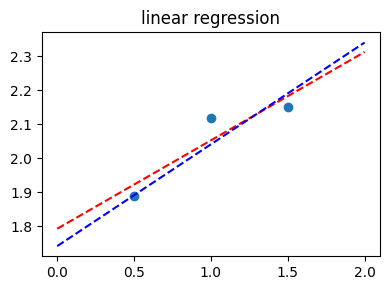

In [ ]:


#########################################################
#        Simple Linear Regression Algorithms
#########################################################

import numpy as np
import matplotlib.pyplot as plt


# lib function
def truncate_float(float_number, decimal_places):
    multiplier = 10 ** decimal_places
    return int(float_number * multiplier) / multiplier

def data_generation(num_instances):

  # define i_list as independent variable
  s = 0.5
  i_list = []
  x_list = []
  for i in range(num_instances):
    x = s * (i + 1)
    i_list.append(x)
    x_list.extend([x, 1.0])

  # generate e_list as gaussian noise
  u = 0
  v = 0.1
  e_list = np.random.normal(u, v, num_instances)

  # define dependent variable with linear function
  w = 0.5
  b = 1.5
  d_list = []
  for i in range(num_instances):
    d = w * i_list[i] + b + e_list[i]
    d = truncate_float(d, 2)
    d_list.append(d)

  # create i_array, d_array, x-matix, y_matrix
  i_array = np.array(i_list)
  x_array = np.array(x_list)
  d_array = np.array(d_list)

  x_matrix = x_array.reshape(num_instances, 2)
  y_matrix = d_array.reshape(num_instances, 1)

  # print data
  print("x_matrix=", x_matrix)
  print("y_matrix=", y_matrix)

  return(i_array, d_array, x_matrix, y_matrix)


############################################## Algorithm 1: normal equation

def normal_equation(x_matrix, y_matrix, num_instances):

  # compute pseudo inverse
  pseudoinverse = np.linalg.pinv(x_matrix)

  # solve problem, weights1 is 2-d array or matrix
  weights1 = np.matmul(pseudoinverse, y_matrix)

  print("weights1=", weights1)

  return(weights1)


############################################# Algorithm 2: Gradient Descent

def gradient_descent(x_matrix, y_matrix, num_instances):

  # set learning rate and number of iterations
  learning_rate = 0.1
  num_iterations = 100

  # initialize weights2 is 1-d array
  weights2 = np.array([0, 0])

  # perform gradient descent
  for iteration in range(num_iterations):
    for i in range(num_instances):
        gradients = (y_matrix[i] - np.dot(weights2, x_matrix[i])) * x_matrix[i]
        weights2 = weights2 + learning_rate * gradients
    print("weights2=", weights2)

  return(weights2)


def plot_result(i_array, d_array, weights1, weights2):

  # plot data
  x_points = i_array
  y_points = d_array

  plt.plot(x_points, y_points, 'o')

  t = np.arange(0.0, 2.5, 0.5)
  plt.plot(t, weights1[0][0] * t + weights1[1][0], 'r--')
  plt.plot(t, weights2[0] * t + weights2[1], 'b--')
  plt.title('linear regression')

  plt.show()


def main():
   num_instances = 3
   i_array, d_array, x_matrix, y_matrix = data_generation(num_instances)
   weights1 = normal_equation(x_matrix, y_matrix, num_instances)
   weights2 = gradient_descent(x_matrix, y_matrix, num_instances)
   plot_result(i_array, d_array, weights1, weights2)

if __name__ == "__main__":
    main()




Perceptron

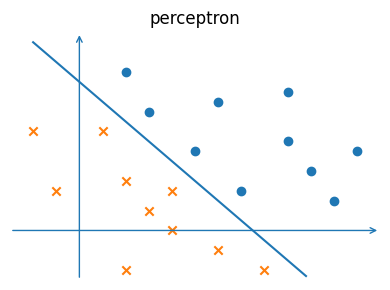

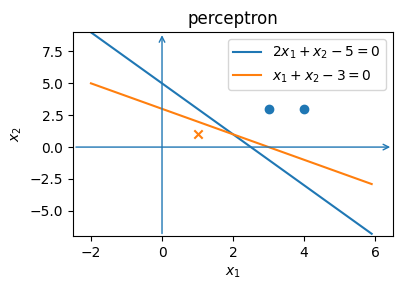

In [ ]:
##########################################################
#  Plot for Perceptron
##########################################################


import math
import numpy as np
import matplotlib.pyplot as plt


############# illustration of perceptron

x = np.arange(-1, 5, 0.1)
y1 = (-2) * x + 7.5

# positive instances
px = [5.5, 3.5, 6, 5, 4.5, 1, 1.5, 4.5, 3, 2.5]
py = [1.5, 2, 4, 3, 4.5, 8, 6, 7, 6.5, 4]

# negative instances
nx = [1, 2, 1, 3, 1.5, 0.5, 2, 4, -1, -0.5]
ny = [2.5, 2, -2, -1, 1, 5, 0, -2, 5, 2]

plt.scatter(px, py, marker="o")
plt.scatter(nx, ny, marker="x")

plt.plot(x,y1,label = "$w_1 x_1 + w_2 x_2 + b = 0$")

plt.xlim(-1.5, 6.5)
plt.ylim(-2.5, 10)
plt.annotate("", xy=(6.5, 0), xytext=(-1.5, 0), arrowprops=dict(arrowstyle="->", color="C0"))
plt.annotate("", xy=(0, 10), xytext=(0, -2.5), arrowprops=dict(arrowstyle="->", color="C0"))

plt.axis('off')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title('perceptron')
plt.show()

############# example of perceptron

x = np.arange(-2, 6, 0.1)
# lines as models
y1 = (-2) * x + 5
y2 = (-1) * x + 3

# positive instances
px = [3, 4]
py = [3, 3]

# negative instances
nx = [1]
ny = [1]

plt.scatter(px, py, marker="o")
plt.scatter(nx, ny, marker="x")
plt.plot(x,y1,label = "$2 x_1 + x_2 - 5 = 0$")
plt.plot(x,y2,label = "$x_1 + x_2 - 3 = 0$")

plt.xlim(-2.5, 6.5)
plt.ylim(-7, 9)
plt.annotate("", xy=(6.5, 0), xytext=(-2.5, 0), arrowprops=dict(arrowstyle="->", color="C0"))
plt.annotate("", xy=(0, 9), xytext=(0, -7), arrowprops=dict(arrowstyle="->", color="C0"))

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.title('perceptron')
plt.show()


Perceptron Algorithm

In [ ]:
#########################################################
#        Perceptron Algorithm
#########################################################

import math
import numpy as np
import matplotlib.pyplot as plt


###############################################


def data_generation():
  # create i_list as independent variable

  num_instances = 3

  # instances
  instance_x1_list = [3, 4, 1]
  instance_x2_list = [3, 3, 1]

  # labels
  label_list = [1, 1, -1]

  x_list = []
  y_list = []
  for i in range(num_instances):
     x_list.extend([instance_x1_list[i], instance_x2_list[i] , 1.0])
     y_list.append(label_list[i])

  x_array = np.array(x_list)
  x_matrix = x_array.reshape(num_instances, 3)
  y_matrix = np.array(y_list)

  print("x_matrix = ", x_matrix)
  print("y_matrix = ", y_matrix)

  return(x_matrix, y_matrix, num_instances)


############################################# Algorithm: Gradient Descent

def gradient_descent(x_matrix, y_matrix, num_instances):

  # set learning rate and number of iterations
  learning_rate = 1

  # weights is 1-d array
  weights = np.array([0, 0, 0])

  # perform gradient descent

  margin = -1
  while(margin <= 0):
    for i in range(num_instances):
      margin = y_matrix[i] * np.dot(weights, x_matrix[i])
      if(margin <= 0):
        gradients = y_matrix[i] * x_matrix[i]
        weights = weights + learning_rate * gradients
        print("weights=", weights)

  return(weights)

##############################################


def main():
   x_matrix, y_matrix, num_instances = data_generation()
   weights = gradient_descent(x_matrix, y_matrix, num_instances)


if __name__ == "__main__":
    main()


x_matrix =  [[3. 3. 1.]
 [4. 3. 1.]
 [1. 1. 1.]]
y_matrix =  [ 1  1 -1]
weights= [3. 3. 1.]
weights= [2. 2. 0.]
weights= [ 1.  1. -1.]
weights= [ 0.  0. -2.]
weights= [ 3.  3. -1.]
weights= [ 2.  2. -2.]
weights= [ 1.  1. -3.]


KNN

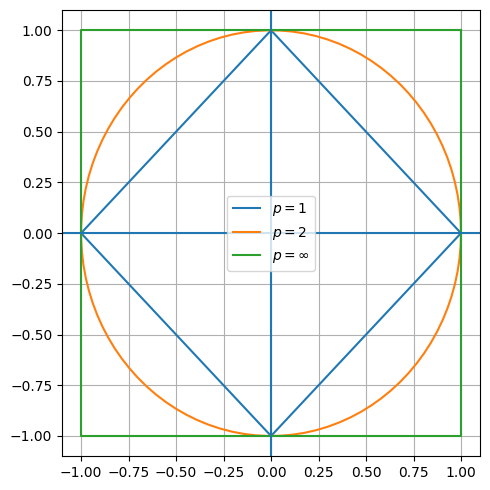

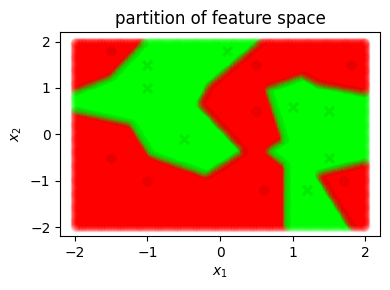

In [ ]:

#####################################################
#     PLot for KNN
#####################################################

import math
import numpy as np
import matplotlib.pyplot as plt

##################### Lp distances

plt.figure(figsize=(5, 5))
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

x1 = np.array([0, 1, 0, -1, 0])
y1 = np.array([1, 0, -1, 0, 1])
plt.plot(x1, y1, label='$p=1$')

u=0    #x-position of the center
v=0    #y-position of the center
a=1    #radius on the x-axis
b=1    #radius on the y-axis
t = np.linspace(0, 2*math.pi, 100)
x2 = u + a * np.cos(t)
y2 = v + b * np.sin(t)
plt.plot(x2, y2, label='$p=2$' )

x3 = np.array([1, 1, -1, -1, 1])
y3 = np.array([1, -1, -1, 1, 1])
plt.plot(x3, y3, label = '$p=\infty$')

plt.axhline()
plt.axvline()
plt.grid(True)
plt.legend()

plt.show()

##################### KNN in partition of space

# calculate minimum distance between (x_value, y_value) and (x_list, y_list)
def min_distance(x_value, y_value, x_list, y_list):
    min = 100  # maximum distance
    for i in range(len(x_list)):
        dis = math.sqrt((x_value - x_list[i]) ** 2 + (y_value - y_list[i]) ** 2)
        if (dis < min):
            min = dis
    return min


# plot positive and negative instances

pos_x_value = [0.5, 0.5, 0.6, 1.8, -1.5, 1.7, -1.5, -1.0]
pos_y_value = [0.5, 1.5, -1.2, 1.5, -0.5, -1.0, 1.8, -1.0]
neg_x_value = [1.0, -0.5, 0.1, 1.2, 1.5, -1.0, 1.5, -1.0]
neg_y_value = [0.6, -0.1, 1.8, -1.2, -0.5, 1.5, 0.5, 1.0]

plt.scatter(pos_x_value, pos_y_value, marker = 'o', color = 'black')
plt.scatter(neg_x_value, neg_y_value, marker = 'x', color = 'black')

# plot positive and negative regions

lighter_green = (0, 1, 0, 0.05)
lighter_red = (1, 0, 0, 0.05)

# create a list of values
start_value = -2  # start of linspace
end_value = 2    # end of linspace
num_values = 200  # number of elements

value_list = np.linspace(start_value, end_value, num_values)

for x_value in value_list:
    for y_value in value_list:
        pos_min_dis = min_distance(x_value, y_value, pos_x_value, pos_y_value)
        neg_min_dis = min_distance(x_value, y_value, neg_x_value, neg_y_value)
        if (pos_min_dis >= neg_min_dis):
            plt.plot(x_value, y_value, 'o', color = lighter_green )
        else:
            plt.plot(x_value, y_value, 'o', color = lighter_red )

# figure
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title('partition of feature space', loc='center')

plt.show()

Decision Tree

<ipython-input-11-6643b50d5944>:18: RuntimeWarning: divide by zero encountered in log2
  y = - x * np.log2(x) - (1-x) * np.log2(1-x)
<ipython-input-11-6643b50d5944>:18: RuntimeWarning: invalid value encountered in multiply
  y = - x * np.log2(x) - (1-x) * np.log2(1-x)


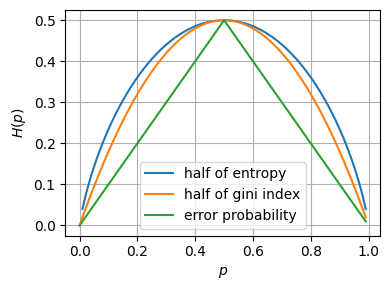

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


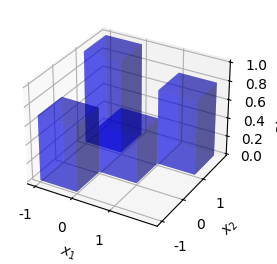

In [ ]:
################# Plot for decision tree

import numpy as np
from matplotlib import pyplot as plt

########### Plot entropy

def error_prob(x):
    y = []
    for t in np.nditer(x):
        if t < 0.5:
           y.append(t)
        else:
           y.append(1-t)
    return(y)

x = np.arange(0, 1, 0.01)
y = - x * np.log2(x) - (1-x) * np.log2(1-x)
y1 = y / 2
y2 = 2 * x * (1-x)
y3 = error_prob(x)

#plt.plot(x, y, label='entropy')
plt.plot(x, y1, label='half of entropy')
plt.plot(x, y2, label='half of gini index')
plt.plot(x, y3, label='error probability')
plt.xlabel("$p$")
plt.ylabel("$H(p)$")
plt.legend()
plt.grid(True)
plt.show()


#########  Plot 3d Histogram

plt.rcParams["figure.figsize"] = [4.0, 3.0]
plt.rcParams["figure.autolayout"] = True

lighter_blue = (0, 0, 1, 0.4)

feature1 = ['-1', '0', '1']
feature2 = ['-1', '0', '1']

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x = [1, 2, 3, 1]
y = [1, 2, 3, 3]
z = [0, 0, 0, 0]

dx = [1, 1, 1, 1]
dy = [1, 1, 1, 1]
dz = [0.7, 0.5, 0.8, 1]

ax.bar3d(x, y, z, dx, dy, dz, color=lighter_blue)
ax.axis('on')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$P(y=1|x)$')
ax.set_xticks([1, 2, 3], feature1)
ax.set_yticks([1, 2, 3], feature2)

plt.show()

Logistic Regression

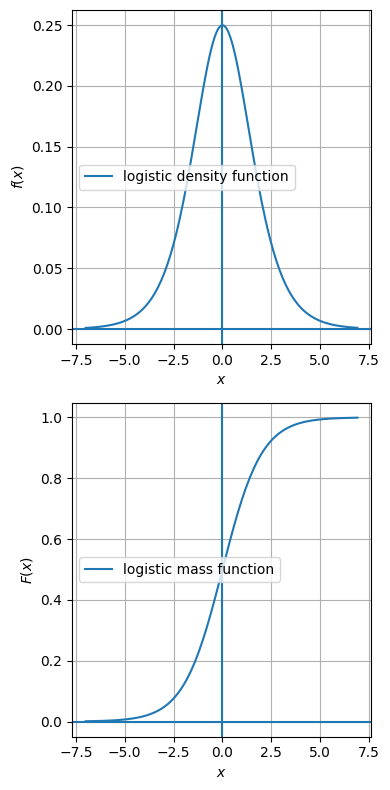

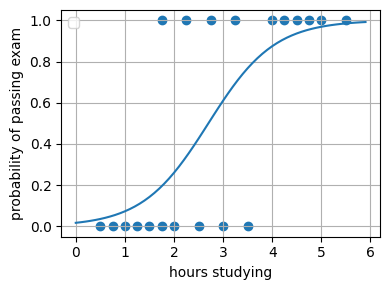

In [ ]:
##########################################################
#  Plot logistic regression
##########################################################

import numpy as np
import math
import matplotlib.pyplot as plt

########## logositic distribution

def logistic_mass(x, mu, gamma):
    y = 1 / (1 + np.exp((-1) * (x-mu)/gamma))
    return(y)

def logistic_density(x, mu, gamma):
    y = np.exp((-1) * (x-mu)/gamma) / (gamma * (1 + np.exp((-1) * (x-mu)/gamma))**2 )
    return(y)

mu = 0
gamma = 1

x = np.arange(-7, 7, 0.1)
y1 = logistic_mass(x, mu, gamma)
y2 = logistic_density(x, mu, gamma)

plt.figure(figsize=(4, 8))
plt.subplots_adjust(hspace = 0.5)


plt.subplot(2, 1, 1)
plt.axhline()
plt.axvline()
plt.grid()
plt.plot(x, y2, label='logistic density function')
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend(loc='center left')

plt.subplot(2, 1, 2)
plt.axhline()
plt.axvline()
plt.grid()
plt.plot(x, y1, label='logistic mass function')
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.legend(loc='center left')

plt.show()


############# an example of logistic regression

def logistic_regression(x, mu, gamma):
    y = 1 / (1 + np.exp(((-1.0) * (x - mu)) / gamma))
    return(y)

x = np.arange(0, 6, 0.1)
mu = 2.7
gamma = 0.67
y = logistic_regression(x, mu, gamma)

# data
x1 = [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]
y1 = [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]

plt.plot(x, y)
plt.scatter(x1, y1)
plt.grid()
plt.xlabel("hours studying")
plt.ylabel("probability of passing exam")
plt.legend()
plt.show()



Logistic Regression Algorithm

x_matrix =  [[0.5  1.  ]
 [0.75 1.  ]
 [1.   1.  ]
 [1.25 1.  ]
 [1.5  1.  ]
 [1.75 1.  ]
 [1.75 1.  ]
 [2.   1.  ]
 [2.25 1.  ]
 [2.5  1.  ]
 [2.75 1.  ]
 [3.   1.  ]
 [3.25 1.  ]
 [3.5  1.  ]
 [4.   1.  ]
 [4.25 1.  ]
 [4.5  1.  ]
 [4.75 1.  ]
 [5.   1.  ]
 [5.5  1.  ]]
y_matrix =  [0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1]
weights= [ 1.50675826 -4.09035351]


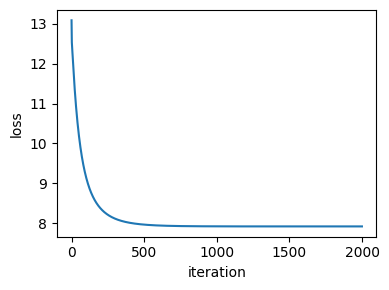

In [ ]:
#########################################################
#        Logistic Regression Learning Algorithm
#########################################################

import math
import numpy as np
import matplotlib.pyplot as plt


###############################################


def data_generation():

  # create instance list and label list
  num_instances = 20

  # instances
  instance_x1_list = [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50 ]

  # labels
  label_list = [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]

  x_list = []
  y_list = []
  for i in range(num_instances):
     x_list.extend([instance_x1_list[i], 1.0])
     y_list.append(label_list[i])

  x_array = np.array(x_list)
  x_matrix = x_array.reshape(num_instances, 2)
  y_matrix = np.array(y_list)

  print("x_matrix = ", x_matrix)
  print("y_matrix = ", y_matrix)

  return(x_matrix, y_matrix, num_instances)


############################################# Algorithm: Gradient Descent

def gradient_descent(x_matrix, y_matrix, num_instances, num_iterations):

  # set learning rate and number of iterations
  learning_rate = 0.01
  # initialize weights in 1-d array and loss
  weights = np.array([0, 0])
  loss = [0] * num_iterations

  # perform gradient descent
  for iteration in range(num_iterations):
    for i in range(num_instances):
      prob = 1 / (1 + math.exp((-1) * np.dot(weights, x_matrix[i])))
      gradients = (y_matrix[i] - prob) * x_matrix[i]
      weights = weights + learning_rate * gradients
      loss[iteration] += (-1) * y_matrix[i] * np.dot(weights, x_matrix[i]) + math.log(1 + math.exp(np.dot(weights, x_matrix[i])))

  return(weights, loss)

##############################################

# plot the loss in training
def plot_loss(loss, num_iterations):
  x = np.arange(0, num_iterations)
  y = loss
  plt.plot(x, y, label = '$loss$')
  plt.xlabel("iteration")
  plt.ylabel("loss")
  plt.show()
  return()


def main():
   num_iterations = 2000
   x_matrix, y_matrix, num_instances = data_generation()
   weights, loss = gradient_descent(x_matrix, y_matrix, num_instances, num_iterations)
   print("weights=", weights)
   plot_loss(loss, num_iterations)


if __name__ == "__main__":
    main()


Support Vector Machine

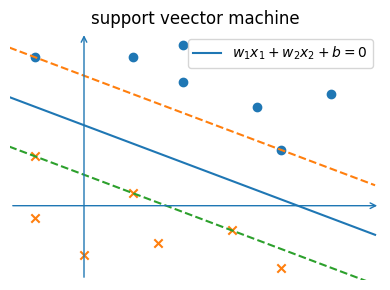

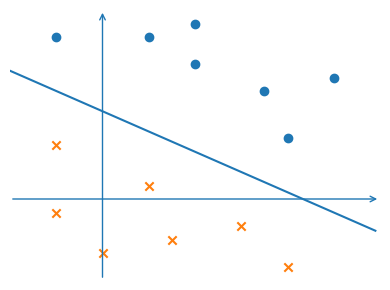

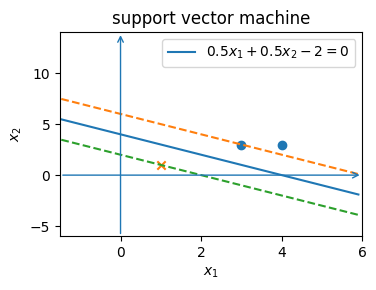

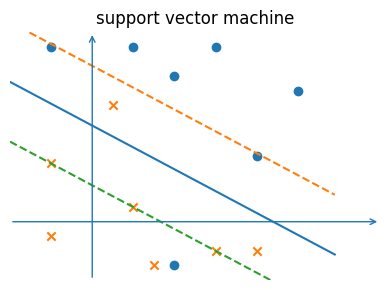

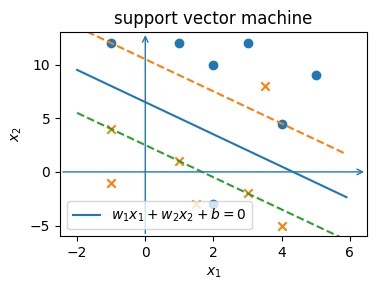

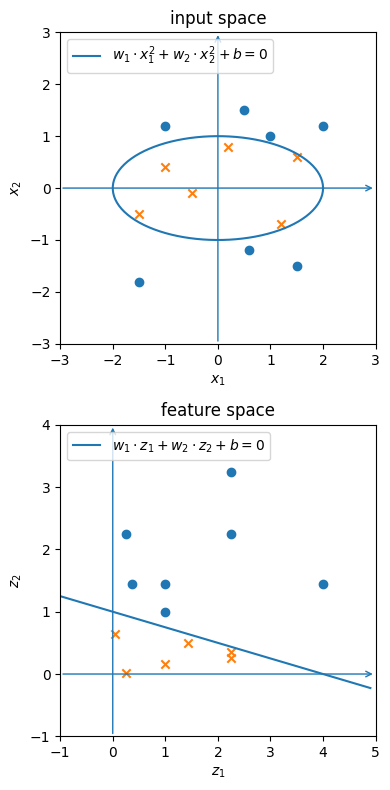

In [ ]:
##########################################################
#  Plot for Support Vector Machine
##########################################################


import math
import numpy as np
import matplotlib.pyplot as plt


############# illustration of svm model

# positive instances
#px = [5.5, 3.5, 6, 5, 4.5, 1, 1.5, 4.5, 3, 2.5]
#py = [1.5, 1.5, 4, 3, 4.5, 8, 5.5, 7, 6.5, 3.5]

# negative instances
#nx = [1, 2, 1, 3, 1.5, 0.5, 2, 4, -1, -0.5]
#ny = [2.5, 2.5, -2, -1, 1, 5.5, -1.5, -1.5, 5, 2]

x = np.arange(-2, 6, 0.1)
y1 = (-1.5) * x + 6.5
y2 = (-1.5) * x + 10.5
y3 = (-1.5) * x + 2.5

# positive instances
px = [5, 3.5, -1, 2, 1, 2, 4]
py = [9, 8, 12, 10, 12, 13, 4.5]

# negative instances
nx = [1, 1.5, 3, 4, 0, -1, -1]
ny = [1, -3, -2, -5, -4, 4, -1]

plt.xlim(-1.5, 6)
plt.ylim(-6, 14)
plt.annotate("", xy=(6, 0), xytext=(-1.5, 0), arrowprops=dict(arrowstyle="->", color="C0"))
plt.annotate("", xy=(0, 14), xytext=(0, -6), arrowprops=dict(arrowstyle="->", color="C0"))

plt.scatter(px, py, marker="o")
plt.scatter(nx, ny, marker="x")
plt.plot(x, y1, label = "$w_1 x_1 + w_2 x_2 + b = 0$")
plt.plot(x, y2, linestyle = 'dashed')   # boundary
plt.plot(x, y3, linestyle = 'dashed')   # boundary
plt.axis('off')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.title('support veector machine')
plt.show()

############# svm margin

x = np.arange(-2, 6, 0.1)
y = (-1.5) * x + 6.5

# positive instances
px = [5, 3.5, -1, 2, 1, 2, 4]
py = [9, 8, 12, 10, 12, 13, 4.5]

# negative instances
nx = [1, 1.5, 3, 4, 0, -1, -1]
ny = [1, -3, -2, -5, -4, 4, -1]

plt.scatter(px, py, marker="o")
plt.scatter(nx, ny, marker="x")
plt.plot(x, y)

plt.xlim(-2, 6)
plt.ylim(-6, 14)
plt.annotate("", xy=(6, 0), xytext=(-2, 0), arrowprops=dict(arrowstyle="->", color="C0"))
plt.annotate("", xy=(0, 14), xytext=(0, -6), arrowprops=dict(arrowstyle="->", color="C0"))

plt.axis('off')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.show()

############# svm example one

x = np.arange(-2, 6, 0.1)
y1 = (-1) * x + 4
y2 = (-1) * x + 6
y3 = (-1) * x + 2

# positive instances
px = [3, 4]
py = [3, 3]

# negative instances
nx = [1]
ny = [1]

plt.xlim(-1.5, 6)
plt.ylim(-6, 14)
plt.annotate("", xy=(6, 0), xytext=(-1.5, 0), arrowprops=dict(arrowstyle="->", color="C0"))
plt.annotate("", xy=(0, 14), xytext=(0, -6), arrowprops=dict(arrowstyle="->", color="C0"))

plt.scatter(px, py, marker="o")
plt.scatter(nx, ny, marker="x")
plt.plot(x,y1,label = "$ 0.5 x_1 + 0.5 x_2 - 2 = 0$")
plt.plot(x,y2,linestyle = 'dashed')
plt.plot(x,y3,linestyle = 'dashed')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.title('support vector machine')
plt.show()

############# svm soft margin

x = np.arange(-2, 6, 0.1)
y1 = (-1.5) * x + 6.6  # 6.5
y2 = (-1.5) * x + 10.7  # 10.5
y3 = (-1.5) * x + 2.5

# positive instances
px = [5, 3, -1, 2, 1, 2, 4]
py = [9, 12, 12, 10, 12, -3, 4.5]

# negative instances
nx = [1, 1.5, 3, 4, 0.5, -1, -1]
ny = [1, -3, -2, -2, 8, 4, -1]

plt.xlim(-2, 7)
plt.ylim(-4, 13)
plt.annotate("", xy=(7, 0), xytext=(-2, 0), arrowprops=dict(arrowstyle="->", color="C0"))
plt.annotate("", xy=(0, 13), xytext=(0, -4), arrowprops=dict(arrowstyle="->", color="C0"))


plt.scatter(px, py, marker="o")
plt.scatter(nx, ny, marker="x")
plt.plot(x, y1, label = "$w_1 x_1 + w_2 x_2 + b = 0$")
plt.plot(x, y2, linestyle = 'dashed')
plt.plot(x, y3, linestyle = 'dashed')


plt.axis('off')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title('support vector machine')
plt.show()

############# svm example two

x = np.arange(-2, 6, 0.1)
y1 = (-1.5) * x + 6.5
y2 = (-1.5) * x + 10.5
y3 = (-1.5) * x + 2.5

# positive instances
px = [5, 3, -1, 2, 1, 2, 4]
py = [9, 12, 12, 10, 12, -3, 4.5]

# negative instances
nx = [1, 1.5, 3, 4, 3.5, -1, -1]
ny = [1, -3, -2, -5, 8, 4, -1]

plt.xlim(-2.5, 6.5)
plt.ylim(-6, 13)
plt.annotate("", xy=(6.5, 0), xytext=(-2.5, 0), arrowprops=dict(arrowstyle="->", color="C0"))
plt.annotate("", xy=(0, 13), xytext=(0, -6.0), arrowprops=dict(arrowstyle="->", color="C0"))

plt.scatter(px, py, marker="o")
plt.scatter(nx, ny, marker="x")

plt.plot(x, y1, label = "$w_1 x_1 + w_2 x_2 + b = 0$")
plt.plot(x, y2, linestyle = 'dashed')
plt.plot(x, y3, linestyle = 'dashed')

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.title('support vector machine')
plt.show()


######################## svm and kernel trick

######  input space

plt.figure(figsize=(4, 8))
plt.subplot(2, 1, 1)
plt.subplots_adjust(hspace = 0.6)

#  plot ellipse
plt.xlim(-3, 3)
plt.ylim(-3, 3)
u=0    #x-position of the center
v=0    #y-position of the center
a=2     #radius on the x-axis
b=1    #radius on the y-axis
t = np.linspace(0, 2*math.pi, 100)
x =  u + a * np.cos(t)
y =  v + b * np.sin(t)
plt.plot(x, y, label='$w_1 \cdot x_1^2 + w_2 \cdot x_2^2 + b = 0$' )

#  data points
px_1 = [0.5, 0.6, -1.5, 1.5, 1, -1, 2]
px_2 = [1.5, -1.2, -1.8, -1.5, 1, 1.2, 1.2]
nx_1 = [1.5, -0.5, -1.5, -1.0, 1.2, 0.2]
nx_2 = [0.6, -0.1, -0.5, 0.4, -0.7, 0.8]
plt.scatter(px_1, px_2, marker="o")
plt.scatter(nx_1, nx_2, marker="x")

plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.annotate("", xy=(3, 0), xytext=(-3, 0), arrowprops=dict(arrowstyle="->", color="C0"))
plt.annotate("", xy=(0, 3), xytext=(0, -3), arrowprops=dict(arrowstyle="->", color="C0"))

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend(loc = 'upper left')
plt.title('input space', loc='center')

######  feature space

plt.subplot(2, 1, 2)

# plot line
plt.xlim(-1, 5)
plt.ylim(-1, 4)
x = np.arange(-1, 5, 0.1)
w = -0.25
b = 1
y = w * x + b
plt.plot(x, y, label = '$w_1 \cdot z_1 + w_2 \cdot z_2 + b = 0$')

# data points
pz_1 = np.power(px_1,2)
pz_2 = np.power(px_2,2)
nz_1 = np.power(nx_1,2)
nz_2 = np.power(nx_2,2)
plt.scatter(pz_1,pz_2, marker="o")
plt.scatter(nz_1,nz_2, marker="x")

plt.xlim(-1, 5)
plt.ylim(-1, 4)
plt.annotate("", xy=(5, 0), xytext=(-1, 0), arrowprops=dict(arrowstyle="->", color="C0"))
plt.annotate("", xy=(0, 4), xytext=(0, -1), arrowprops=dict(arrowstyle="->", color="C0"))

plt.xlabel("$z_1$")
plt.ylabel("$z_2$")
plt.legend(loc='upper left')
plt.title('feature space', loc='center')
plt.show()


In [ ]:
Support Vector Machine Algorithm

instances1 [5, 3, -1, 2, 1, 2, 4, 1, 1.5, 3, 4, 3.5, -1, -1]
instances2 [9, 12, 12, 10, 12, -3, 4.5, 1, -3, -2, -5, 8, 4, -1]
labels [1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1]
x_matrix =  [[ 5.   9. ]
 [ 3.  12. ]
 [-1.  12. ]
 [ 2.  10. ]
 [ 1.  12. ]
 [ 2.  -3. ]
 [ 4.   4.5]
 [ 1.   1. ]
 [ 1.5 -3. ]
 [ 3.  -2. ]
 [ 4.  -5. ]
 [ 3.5  8. ]
 [-1.   4. ]
 [-1.  -1. ]]
y_matrix =  [ 1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1]
weights= [0.36706131 0.2462667 ] bias= -1.6259999999999317
svm: slop= -1.4905032613802283 intercept= 6.602598030293526


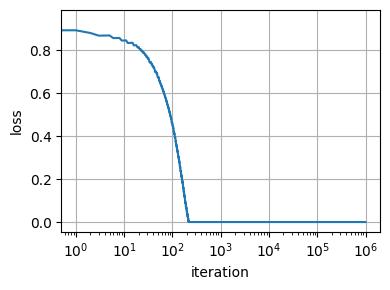

In [ ]:
#########################################################
#        Support Vector Machine Algorithm
#########################################################

import math
import numpy as np
import matplotlib.pyplot as plt


###############################################


def data_generation(num_instances):
  # create i_list as independent variable

  # positive instances
  #px = [5.5, 3.5, 6, 5, 4.5, 1, 1.5, 4.5, 3, 2.5]
  #py = [1.5, 1.5, 4, 3, 4.5, 8, 5.5, 7, 6.5, 3.5]

  # negative instances
  #nx = [1, 2, 1, 3, 1.5, 0.5, 2, 4, -1, -0.5]
  #ny = [2.5, 2.5, -2, -1, 1, 5.5, -1.5, -1.5, 5, 2]

  # positive instances
  px = [5, 3, -1, 2, 1, 2, 4]
  py = [9, 12, 12, 10, 12, -3, 4.5]

  # negative instances
  nx = [1, 1.5, 3, 4, 3.5, -1, -1]
  ny = [1, -3, -2, -5, 8, 4, -1]

  instance_x1_list = px + nx
  instance_x2_list = py + ny

  print("instances1", instance_x1_list)
  print("instances2", instance_x2_list)

  # labels
  label_list = [+1] * len(px) + [-1] * len(nx)

  print("labels", label_list)

  x_list = []
  y_list = []
  for i in range(num_instances):
     x_list.extend([instance_x1_list[i], instance_x2_list[i]])
     y_list.append(label_list[i])

  x_array = np.array(x_list)
  x_matrix = x_array.reshape(num_instances, 2)
  y_matrix = np.array(y_list)

  print("x_matrix = ", x_matrix)
  print("y_matrix = ", y_matrix)

  return(x_matrix, y_matrix, num_instances)


############################################# Algorithm 2: Gradient Descent

def gradient_descent(x_matrix, y_matrix, num_instances, num_iterations):

  # set learning rate and number of iterations
  learning_rate = 0.001
  coefficient = 0.001
  # weights is 1-d array
  weights = np.array([0, 0])
  bias = 0
  loss = [0] * num_iterations

  # perform gradient descent

  for iteration in range(num_iterations):
    for i in range(num_instances):
      margin = y_matrix[i] * (np.dot(weights, x_matrix[i]) + bias)
      if(margin <= 1):
        weights_gradients = y_matrix[i] * x_matrix[i] + (-1) * coefficient * weights
        bias_gradient = y_matrix[i]
        weights = weights + learning_rate * weights_gradients
        bias = bias + learning_rate * bias_gradient
      else:
        weights_gradients = (-1) * coefficient * weights
        weights = weights + learning_rate * weights_gradients
    loss[iteration] = max(0, 1 - y_matrix[i] * (np.dot(weights, x_matrix[i]) + bias))

  return(weights, bias, loss)

##############################################

def plot_loss(loss, num_iterations):
  x = np.arange(0, num_iterations)
  y = loss
  plt.plot(x, y, label = '$loss$')
  plt.xlabel("iteration")
  plt.ylabel("loss")
  plt.xscale('log')
  plt.grid()
  plt.show()
  return()


def main():
   num_iterations = 1000000
   num_instances = 14
   x_matrix, y_matrix, num_instances = data_generation(num_instances)
   weights, bias, loss = gradient_descent(x_matrix, y_matrix, num_instances, num_iterations)
   print("weights=", weights, "bias=", bias)
   slop = (-1) * weights[0] / weights[1]
   intercept = (-1) * bias / weights[1]
   print("svm: slop=", slop, "intercept=", intercept)
   plot_loss(loss, num_iterations)


if __name__ == "__main__":
    main()


# Unsupervised Learning

Clustering

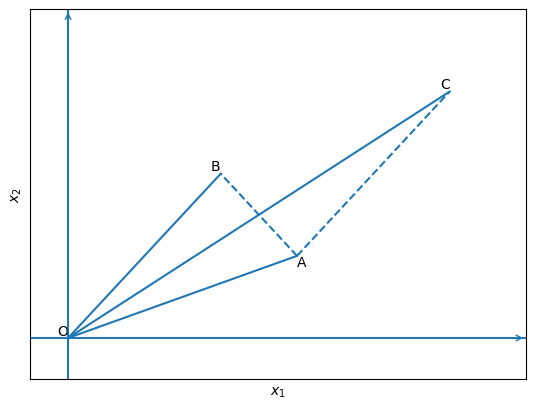

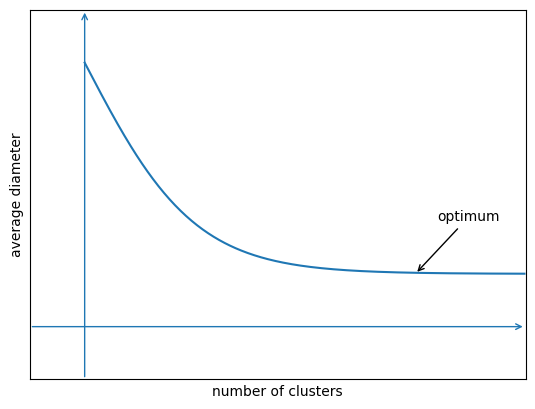

In [ ]:
#################################  Plot for clustering

import math
import numpy as np
import matplotlib.pyplot as plt

########## plot example of cosine similarity

# A
x1 = [0, 3]
y1 = [0, 1]
# B
x2 = [2, 0]
y2 = [2, 0]
# C
x3 = [5, 0]
y3 = [3, 0]

x4 = [3, 2]
y4 = [1, 2]

x5 = [3, 5]
y5 = [1, 3]

plt.xlim(-0.5, 6)
plt.ylim(-0.5, 4)
plt.axhline()
plt.axvline()

plt.plot(x1,y1,linestyle = 'solid', color = 'C0')
plt.plot(x2,y2,linestyle = 'solid', color = 'C0')
plt.plot(x3,y3,linestyle = 'solid', color = 'C0')
plt.plot(x4,y4,linestyle = 'dashed', color = 'C0')
plt.plot(x5,y5,linestyle = 'dashed', color = 'C0')

# Add labels to starting points
plt.text(x1[0], y1[0], "O", ha='right', va='bottom')
plt.text(x2[0], y2[0], "B", ha='right', va='bottom')
plt.text(x3[0], y3[0], "C", ha='right', va='bottom')
plt.text(x4[0], y4[0], "A", ha='left', va='top')

plt.xticks([])
plt.yticks([])
plt.annotate("", xy=(6, 0), xytext=(-0.5, 0), arrowprops=dict(arrowstyle="->", color="C0"))
plt.annotate("", xy=(0, 4), xytext=(0, -0.5), arrowprops=dict(arrowstyle="->", color="C0"))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.show()

################## plot number of clusters vs average diameter of clusters

plt.xlim(-0.5, 4)
plt.ylim(-0.5, 3)

x = np.arange(0, 4, 0.01)
y = 4.5 - 4 * ( 1 / (np.exp((-2) * x) + 1))

plt.plot(x, y)

# Add label with arrow to the curve
plt.annotate("optimum", xy=(3, 0.5), xytext=(3.2, 1.0), arrowprops=dict(arrowstyle="->"))

plt.xticks([])
plt.yticks([])
plt.annotate("", xy=(4, 0), xytext=(-0.5, 0), arrowprops=dict(arrowstyle="->", color="C0"))
plt.annotate("", xy=(0, 3), xytext=(0, -0.5), arrowprops=dict(arrowstyle="->", color="C0"))
plt.xlabel("number of clusters")
plt.ylabel("average diameter")
plt.show()



Principal Component Analysis

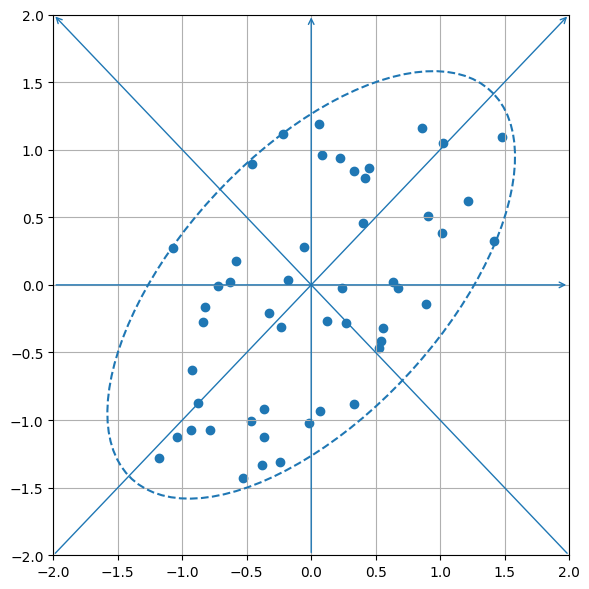

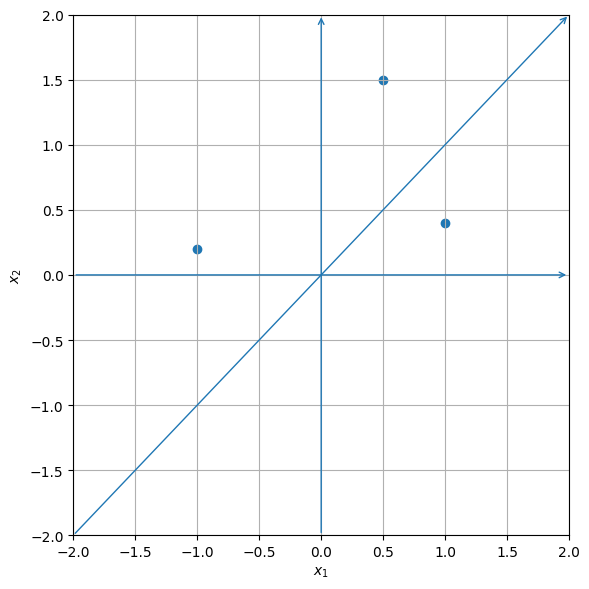

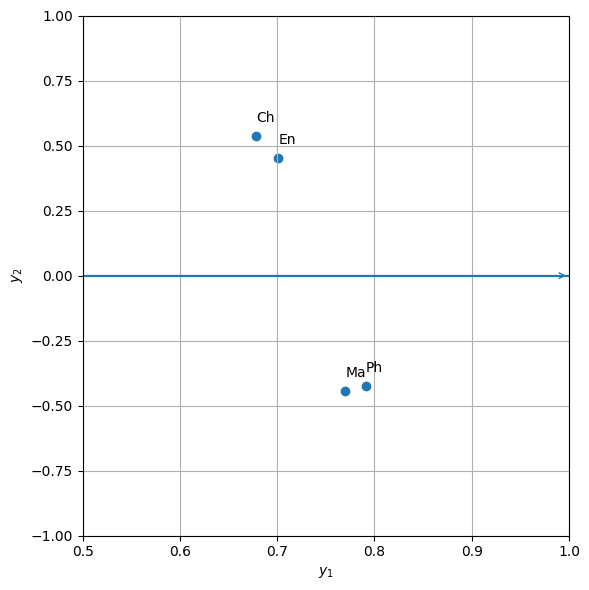

In [ ]:
##  Plot for PCA

import math
import numpy as np
import matplotlib.pyplot as plt


################## plot

# Generate random data points within an ellipse
np.random.seed(10)
num_points = 50
a = 2  # semi-major axis
b = 1  # semi-minor axis
theta = np.random.uniform(0, 2 * np.pi, num_points)

r = np.sqrt(np.random.uniform(0, 1, num_points))
x = a * r * np.cos(theta)
y = b * r * np.sin(theta)

# Rotate the data points by 45 degrees
theta = np.radians(45)
x_rotated = x * np.cos(theta) - y * np.sin(theta)
y_rotated = x * np.sin(theta) + y * np.cos(theta)

# Plot the rotated data points

plt.figure(figsize=(6, 6))
plt.scatter(x_rotated, y_rotated)

# Plot coordinates

plt.annotate("", xy=(2, 0), xytext=(-2, 0), arrowprops=dict(arrowstyle="->", color="C0"))
plt.annotate("", xy=(0, 2), xytext=(0, -2), arrowprops=dict(arrowstyle="->", color="C0"))
plt.annotate("", xy=(2, 2), xytext=(-2, -2), arrowprops=dict(arrowstyle="->", color="C0"))
plt.annotate("", xy=(-2, 2), xytext=(2, -2), arrowprops=dict(arrowstyle="->", color="C0"))

# Set the plot limits and labels

u=0    #x-position of the center
v=0    #y-position of the center
a=2     #radius on the x-axis
b=1    #radius on the y-axis
t = np.linspace(0, 2*math.pi, 100)
x =  u + a * np.cos(t)
y =  v + b * np.sin(t)

# Rotate the data points by 45 degrees
theta = np.radians(45)
x_rotated = x * np.cos(theta) - y * np.sin(theta)
y_rotated = x * np.sin(theta) + y * np.cos(theta)

plt.plot(x_rotated, y_rotated, linestyle='dashed', label='eplise' )

plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid()

plt.show()

#############  plot three points in two coordinate systems

# Plot the data points

x = [1, 0.5, -1]
y = [0.4, 1.5, 0.2]

plt.figure(figsize=(6, 6))
plt.scatter(x, y)

# Plot coordinates

plt.annotate("", xy=(2, 2), xytext=(-2, -2), arrowprops=dict(arrowstyle="->", color="C0"))
plt.annotate("", xy=(2, 0), xytext=(-2, 0), arrowprops=dict(arrowstyle="->", color="C0"))
plt.annotate("", xy=(0, 2), xytext=(0, -2), arrowprops=dict(arrowstyle="->", color="C0"))

# Set the plot limits and labels

plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid()
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.show()


########## plot PCA results

x = [0.678, 0.701, 0.770, 0.791]
y = [0.536, 0.453, -0.444, -0.425]

plt.figure(figsize=(6, 6))
plt.scatter(x, y)

# Add labels to points
labels = ['Ch', 'En', 'Ma', 'Ph']
for i, label in enumerate(labels):
    plt.annotate(label, (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='left')

plt.xlim(0.5, 1)
plt.ylim(-1, 1)
plt.axhline()
plt.axvline()
plt.annotate("", xy=(1, 0), xytext=(0.5, 0), arrowprops=dict(arrowstyle="->", color="C0"))
plt.grid()
plt.xlabel("$y_1$")
plt.ylabel("$y_2$")

plt.show()



EM Algorithm

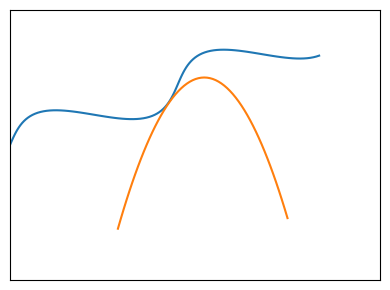

In [ ]:
################### plot illustration of EM algorithm

import math
import numpy as np
import matplotlib.pyplot as plt

# Generate random data points
x = np.linspace(0, 11, 110)
y = np.sin(x)

# Rotate the data points by 45 degrees
theta = np.radians(30)
x_rotated = x * np.cos(theta) - y * np.sin(theta)
y_rotated = x * np.sin(theta) + y * np.cos(theta)

# Plot the smooth curve
plt.plot(x_rotated, y_rotated)

x = np.linspace(3.5, 9, 60)
y = 3.5 - (x - 6.3) ** 2
plt.plot(x, y)

plt.xlim(0, 12)
plt.ylim(-7, 7)
plt.xticks([])
plt.yticks([])

plt.show()


Markov Chain Monte Carlo

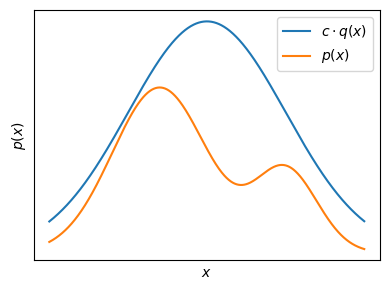

integral =  0.8571202167446931


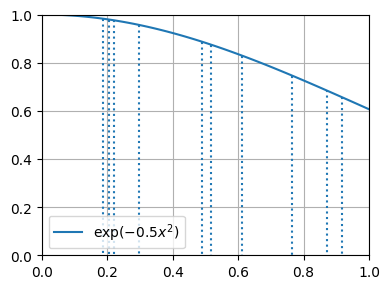

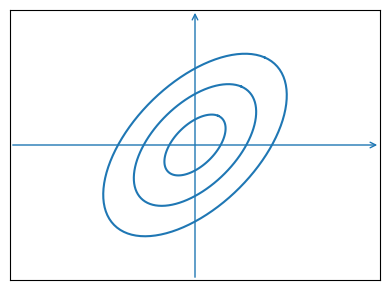

In [ ]:
##  Plot MCMC

import math
import numpy as np
import matplotlib.pyplot as plt


############### distributions for accept-reject sampling

def gaussian(x, mu, sigma):
    y = np.exp((-0.5) * ((x - mu) / sigma )** 2) / (sigma * np.sqrt(2 * math.pi))
    return(y)

x = np.arange(-5, 5, 0.01)
mu = 0
sigma = 1
y = gaussian(x, mu, sigma)
y1 = 0.7 * gaussian(x, 0, 2.5)
y2 = 0.3 * gaussian(x, -1.5, 1.5) + 0.1 * gaussian(x, 2.5, 1)

plt.plot(x, y1, label='$c \cdot q(x)$')
plt.plot(x, y2, label='$p(x)$')
plt.xticks([])
plt.yticks([])
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.legend()
plt.show()


################  sampling for integration calculation

np.random.seed(5)
num_points = 10
x1 = np.random.uniform(0, 1, num_points)
y1 = np.exp((-0.5) * x1 ** 2)
integral = np.mean(y1)
print("integral = ", integral)

# plot data points
for i in range(len(x1)):
    plt.plot([x1[i], x1[i]], [y1[i], 0], linestyle='dotted', color='C0')

# plot function
x = np.linspace(0, 1, 100)
y = np.exp((-0.5) * x ** 2)

# Plot the smooth curve
plt.plot(x, y, label = "$\exp(-0.5 x^2)$")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.show()

################################# plot ellipses for MCMC

# Define the ellipse parameters
center = (0, 0)
width1 = 6
height1 = 3
angle = 60  # Rotation angle in degrees

# Generate the ellipse points
t = np.linspace(0, 2*np.pi, 100)
x1 = center[0] + width1/2 * np.cos(t) * np.cos(np.radians(angle)) - height1/2 * np.sin(t) * np.sin(np.radians(angle))
y1 = center[1] + width1/2 * np.cos(t) * np.sin(np.radians(angle)) + height1/2 * np.sin(t) * np.cos(np.radians(angle))

# Plot the ellipse
plt.plot(x1, y1, color='C0')

# Define the ellipse parameters
center = (0, 0)
width2 = 4
height2 = 2
angle = 60  # Rotation angle in degrees

# Generate the ellipse points
t = np.linspace(0, 2*np.pi, 100)
x2 = center[0] + width2/2 * np.cos(t) * np.cos(np.radians(angle)) - height2/2 * np.sin(t) * np.sin(np.radians(angle))
y2 = center[1] + width2/2 * np.cos(t) * np.sin(np.radians(angle)) + height2/2 * np.sin(t) * np.cos(np.radians(angle))

# Plot the ellipse
plt.plot(x2, y2, color='C0')

# Define the ellipse parameters
center = (0, 0)
width3 = 2
height3 = 1
angle = 60  # Rotation angle in degrees

# Generate the ellipse points
t = np.linspace(0, 2*np.pi, 100)
x3 = center[0] + width3/2 * np.cos(t) * np.cos(np.radians(angle)) - height3/2 * np.sin(t) * np.sin(np.radians(angle))
y3 = center[1] + width3/2 * np.cos(t) * np.sin(np.radians(angle)) + height3/2 * np.sin(t) * np.cos(np.radians(angle))

# Plot the ellipse
plt.plot(x3, y3, color='C0')

plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.annotate("", xy=(4, 0), xytext=(-4, 0), arrowprops=dict(arrowstyle="->", color="C0"))
plt.annotate("", xy=(0, 4), xytext=(0, -4), arrowprops=dict(arrowstyle="->", color="C0"))
plt.xticks([])
plt.yticks([])
# Show the plot
plt.show()



# Deep Learning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Convolution Function

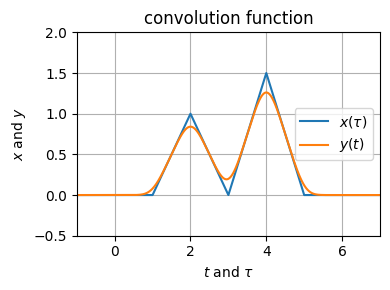

In [ ]:
############################# Plot convolution function

import numpy as np
from scipy.integrate import quad
from scipy.stats import norm
import matplotlib.pyplot as plt

# Define the Gaussian PDF with mean mu and standard deviation sigma
def gaussian_pdf(x, mu=0, sigma=1):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))

# Example: g(x)
def g(x):
    if x < 1:
        y = 0
    elif x >= 1 and x < 2:
        y = x  - 1
    elif x >= 2 and x < 3:
       y = - x + 3
    elif x >= 3 and x < 4:
        y = 1.5 * x - 4.5
    elif x >= 4 and x < 5:
        y = - 1.5 * x + 7.5
    elif x >= 5:
        y = 0
    return y

# Define the expectation function of g(x) with respect to the Gaussian PDF
x = 0
mu = 1
sigma = 1
def expectation_function(x, mu, sigma):
    y = g(x)
    expectation = y * gaussian_pdf(x, mu, sigma)
    return expectation

# Compute the expectation using numerical integration
# The limits for a Gaussian distribution are -inf to inf, but here we use a range that captures most of the distribution

lower_limit, upper_limit = mu - 10*sigma, mu + 10*sigma

# Perform the numerical integration

expectation, error = quad(expectation_function, lower_limit, upper_limit, args=(mu, sigma))

# Plot

x = np.arange(-1, 7, 0.01)
y1 = []
for t in np.nditer(x):
    y1.append(g(t))
y2 = []
for t in np.nditer(x):
    mu = t
    sigma = 0.2
    expectation, error = quad(expectation_function, lower_limit, upper_limit, args=(mu, sigma))
    y2.append(expectation)


plt.xlim(-1, 7)
plt.ylim(-0.5, 2)
plt.plot(x, y1, label='$x(\\tau)$')
plt.plot(x, y2, label='$y(t)$')
plt.grid()
#plt.xticks([])
#plt.yticks([])
plt.xlabel("$t$ and $\\tau$")
plt.ylabel("$x$ and $y$")
plt.legend(loc='center right')
plt.title('convolution function')
plt.show()


Diffusion Models

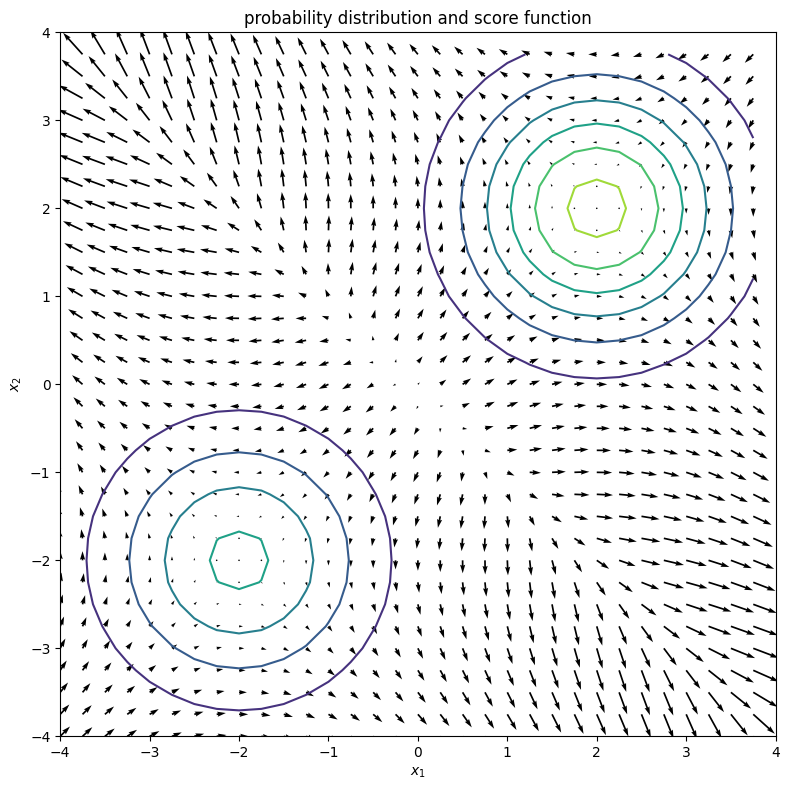

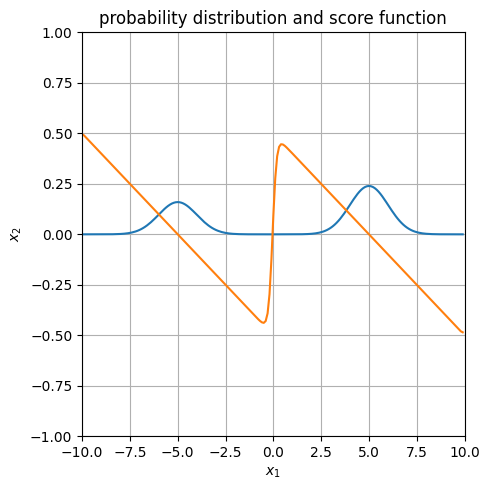

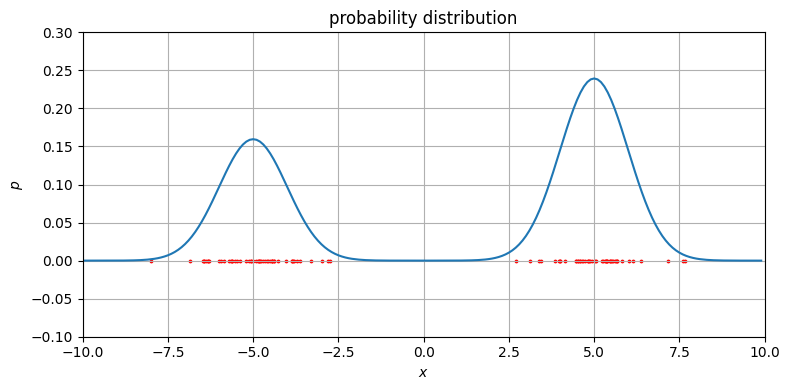

In [ ]:
############################################## Plot for Diffussion Model


import numpy as np
import matplotlib.pyplot as plt

########################################### Plot score function

delta = 0.25
x = np.arange(-4.0, 4.0, delta)
y = np.arange(-4.0, 4.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-0.5 * ((X - 2)**2 + (Y - 2)**2)) / (2 * 3.1416)
Z2 = np.exp(-0.5 * ((X + 2)**2 + (Y + 2)**2)) / (2 * 3.1416)
Z =  0.6 * Z1 + 0.4 * Z2


plt.figure(figsize=(8, 8))
plt.xlim(-4, 4)
plt.ylim(-4, 4)

# Create a contour plot
plt.contour(X, Y, Z)


#############################################

dx, dy = np.gradient(np.log(Z))

# Creating plot
plt.quiver(X, Y, dx, dy)


plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('probability distribution and score function')
plt.show()

##############################################

delta = 0.1
X = np.arange(-10.0, 10.0, delta)
Z1 = np.exp(-0.5 * (X - 5)**2) / (np.sqrt(2 * 3.1416))
Z2 = np.exp(-0.5 * (X + 5)**2) / (np.sqrt(2 * 3.1416))
Z =  0.6 * Z1 + 0.4 * Z2


plt.figure(figsize=(5, 5))
plt.xlim(-10, 10)
plt.ylim(-1, 1)

# Create a contour plot
plt.plot(X, Z)


################################################


dx = np.gradient(np.log(Z))

# Creating plot
plt.plot(X, dx)


plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()
plt.title('probability distribution and score function')
plt.show()



############################################## Plot Gaussian Mixture and Score Function

# parameters of gaussaion mixture
# sigma1 = sigma2 = 1.0
mu1 = 5
mu2 = -5
pi1 = 0.6
pi2 = 0.4

def gaussian_mixture(x):
    y1 = np.exp((-0.5) * (x - mu1)**2) / np.sqrt(2 * 3.1416)
    y2 = np.exp((-0.5) * (x - mu2)**2) / np.sqrt(2 * 3.1416)
    y =  pi1 * y1 + pi2 * y2
    return y


def score_function(x):
    z1 = np.exp((-0.5) * (x - mu1)**2) / np.sqrt(2 * 3.1416)
    z2 = np.exp((-0.5) * (x - mu2)**2) / np.sqrt(2 * 3.1416)
    z =  pi1 * z1 + pi2 * z2

    y1 = np.exp((-0.5) * (x - mu1)**2) / np.sqrt(2 * 3.1416) * (x - mu1)
    y2 = np.exp((-0.5) * (x - mu2)**2) / np.sqrt(2 * 3.1416) * (x - mu2)
    y =  pi1 * y1 + pi2 * y2

    s = (-1) * y / z
    return s


############################################## Sampling with Lagiven Dynamics

delta = 0.1
X = np.arange(-10.0, 10.0, delta)
Y = gaussian_mixture(X)
S = score_function(X)

plt.figure(figsize=(8, 4))
plt.xlim(-10, 10)
plt.ylim(-0.1, 0.3)

# Create a contour plot
plt.plot(X, Y)
# plot score function
#plt.plot(X, S)


delta = 0.1
iterations = 100
samples = 100
sample_x = []
sample_y = []
for j in range (0, samples):
    x = np.zeros(iterations)
    for i in range (0, iterations):
        if (i == 0):
            x[i] = np.random.normal(0,1)
        else:
            epsilon = np.random.normal(0,1)
            score = score_function(x[i-1])
            x[i] = x[i-1] + 0.5 * delta * score + np.sqrt(delta) * epsilon

            # without randomization, gradient ascent
            #x[i] = x[i-1] + 0.5 * delta * score

    sample_x.append(x[i])
    sample_y.append(0)

plt.scatter(sample_x, sample_y, s=3, color = 'red')

plt.xlabel('$x$')
plt.ylabel('$p$')
plt.grid()
plt.title('probability distribution')
plt.show()



# Reinforcement Learning

Multiarm Bandit

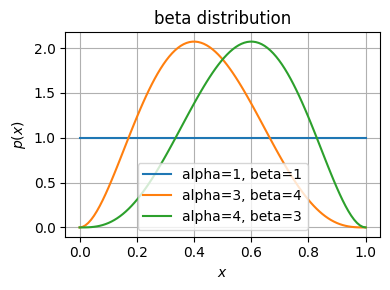

In [ ]:
########### Plot for Multi-Arm Bandit


# Plot beta distribution

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

x = np.linspace(0, 1, 100)
alpha_values = [1, 3, 4]
beta_values = [1, 4, 3]

for alpha, beta_param in zip(alpha_values, beta_values):
    dist = beta(alpha, beta_param)
    plt.plot(x, dist.pdf(x), label=f'alpha={alpha}, beta={beta_param}')

plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.title('beta distribution')
plt.grid()
plt.legend()
plt.show()
